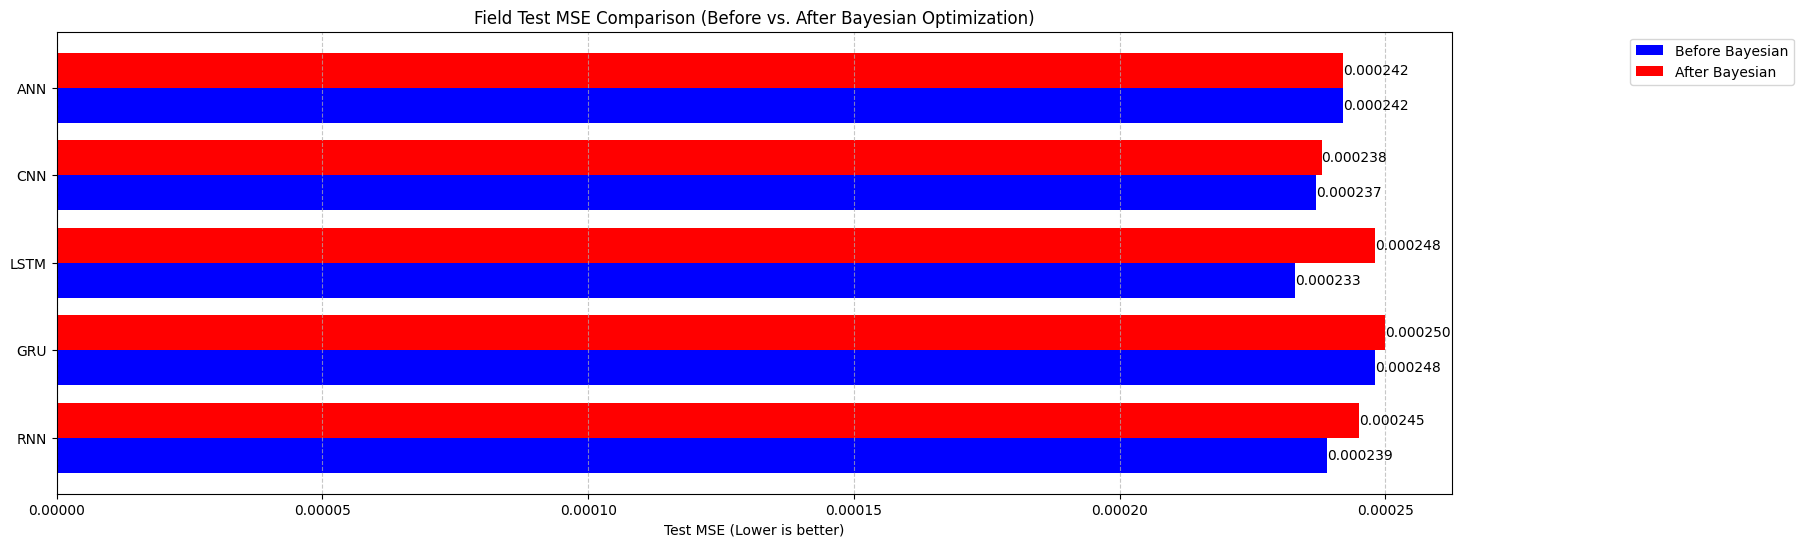

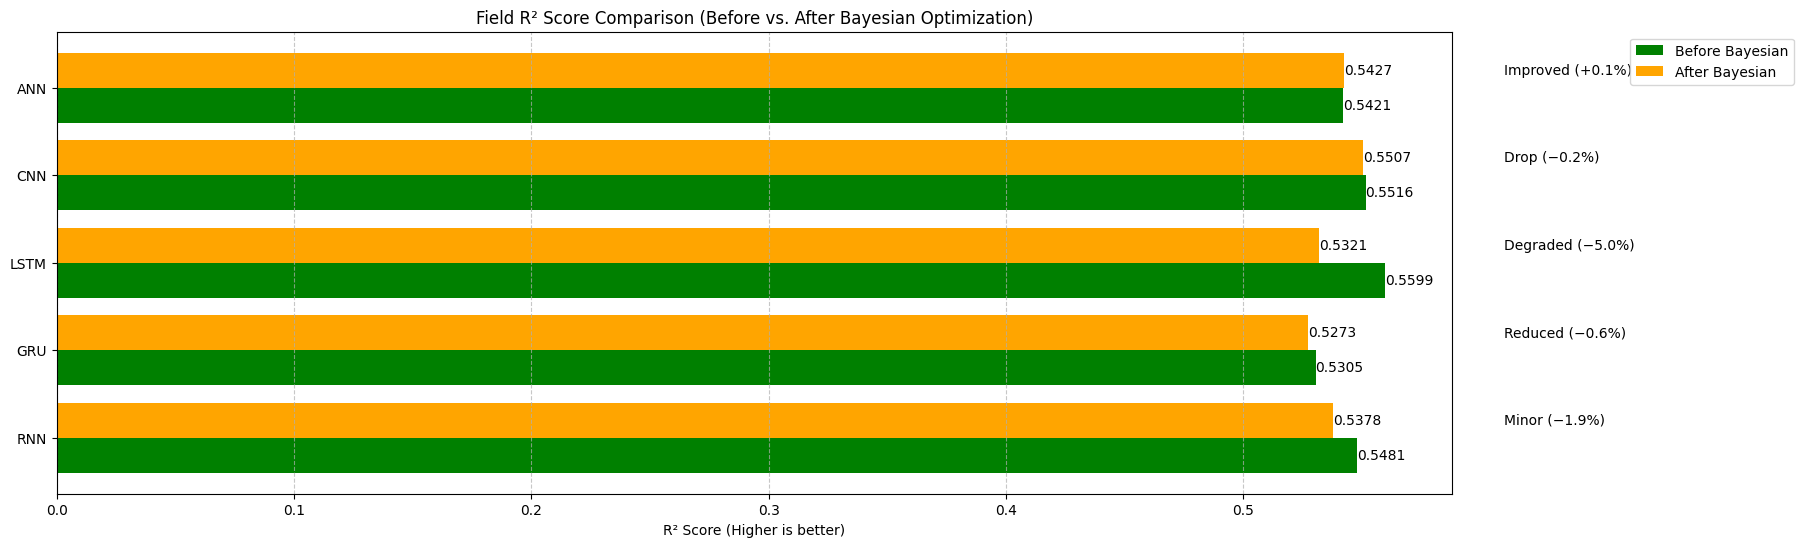

In [10]:
import matplotlib.pyplot as plt

# Model names
models_field = ["ANN", "CNN", "LSTM", "GRU", "RNN"]

# Test MSE (Before & After Bayesian Optimization)
mse_before_field = [0.000242, 0.000237, 0.000233, 0.000248, 0.000239]
mse_after_field =  [0.000242, 0.000238, 0.000248, 0.000250, 0.000245]

# R² Score (Before & After Bayesian Optimization)
r2_before_field = [0.5421, 0.5516, 0.5599, 0.5305, 0.5481]
r2_after_field =  [0.5427, 0.5507, 0.5321, 0.5273, 0.5378]
# Comments on R² Score change
comments_field = [
    "Improved (+0.1%)",
    "Drop (−0.2%)",
    "Degraded (−5.0%)",
    "Reduced (−0.6%)",
    "Minor (−1.9%)"
]

# Plot settings
fig_size = (18, 6)
bar_width = 0.4
x_pos = range(len(models_field))

# ----- Figure 1: Test MSE Comparison (Field) -----
plt.figure(figsize=fig_size)
plt.barh([x + bar_width for x in x_pos], mse_before_field, bar_width, color="blue", label="Before Bayesian")
plt.barh(x_pos, mse_after_field, bar_width, color="red", label="After Bayesian")

plt.xlabel("Test MSE (Lower is better)")
plt.title("Field Test MSE Comparison (Before vs. After Bayesian Optimization)")
plt.yticks([x + bar_width / 2 for x in x_pos], models_field)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

# Add value labels
for i, (before, after) in enumerate(zip(mse_before_field, mse_after_field)):
    plt.text(before, i + bar_width, f"{before:.6f}", va='center', ha='left', fontsize=10)
    plt.text(after, i, f"{after:.6f}", va='center', ha='left', fontsize=10)

plt.show()

# ----- Figure 2: R² Score Comparison (Field) -----
plt.figure(figsize=fig_size)
plt.barh([x + bar_width for x in x_pos], r2_before_field, bar_width, color="green", label="Before Bayesian")
plt.barh(x_pos, r2_after_field, bar_width, color="orange", label="After Bayesian")

plt.xlabel("R² Score (Higher is better)")
plt.title("Field R² Score Comparison (Before vs. After Bayesian Optimization)")
plt.yticks([x + bar_width / 2 for x in x_pos], models_field)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

# Add value labels and one-word comments
for i, (before, after, comment) in enumerate(zip(r2_before_field, r2_after_field, comments_field)):
    plt.text(before, i + bar_width, f"{before:.4f}", va='center', ha='left', fontsize=10)
    plt.text(after, i, f"{after:.4f}", va='center', ha='left', fontsize=10)
    plt.text(0.61, i, comment, va='center', fontsize=10)

plt.show()

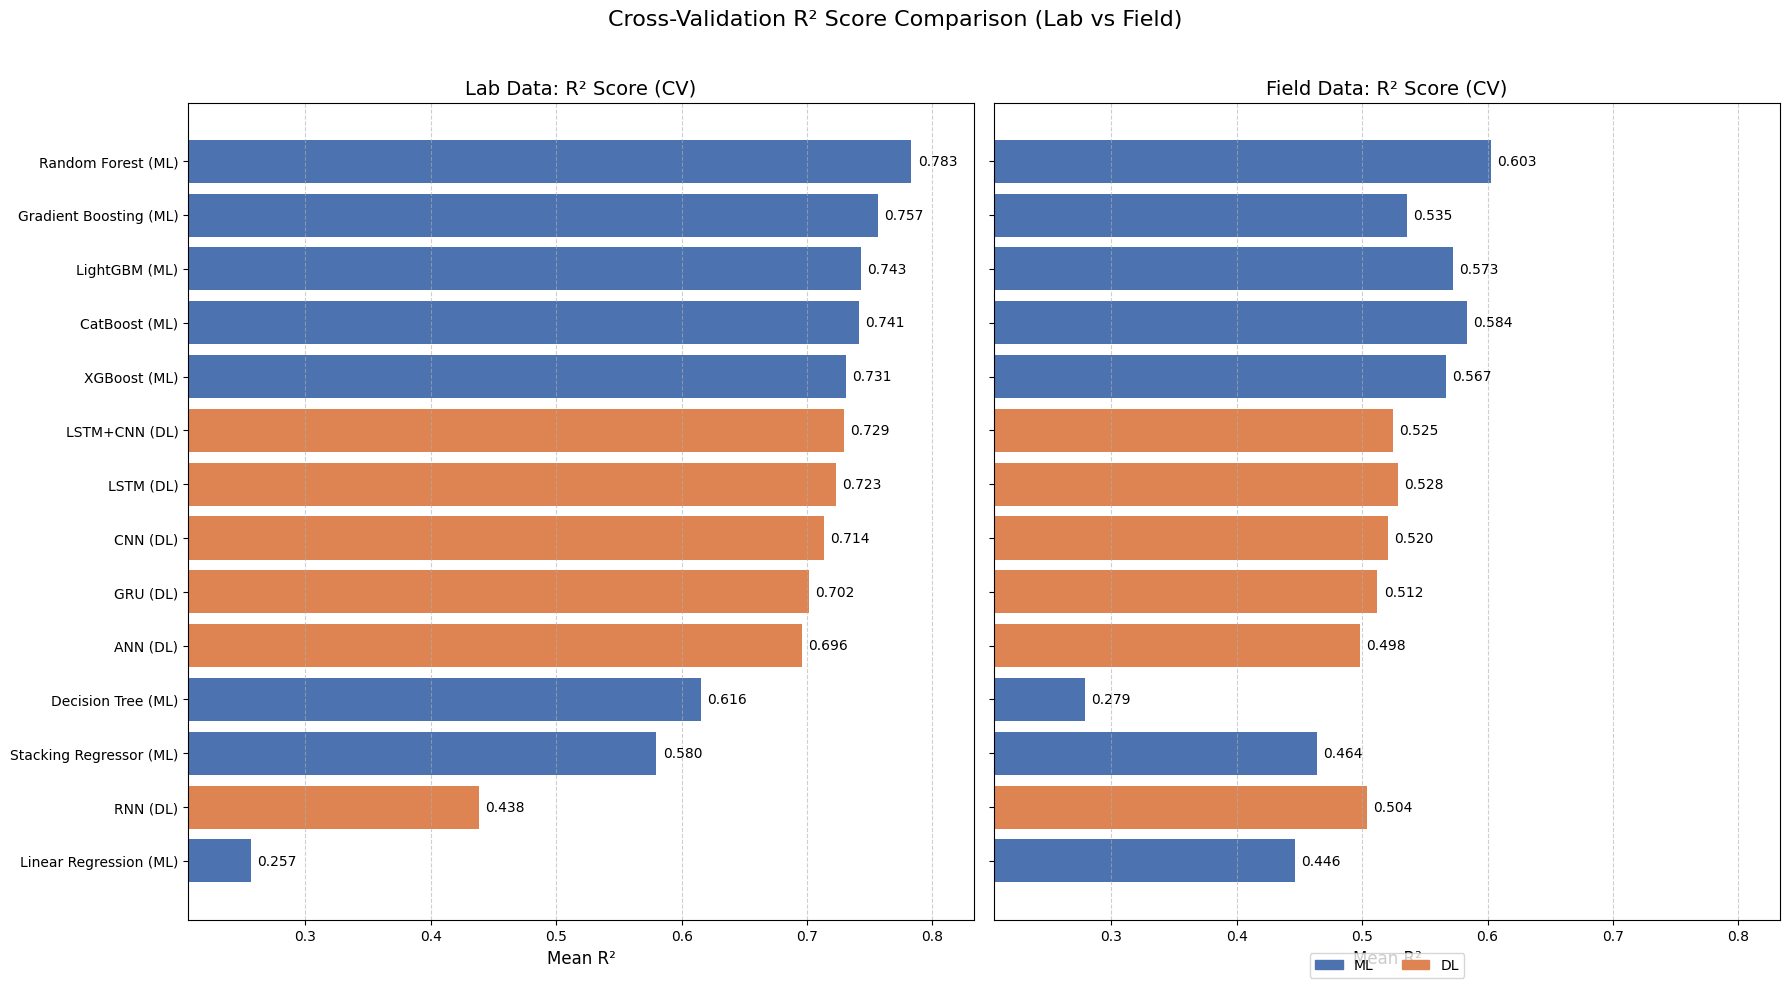

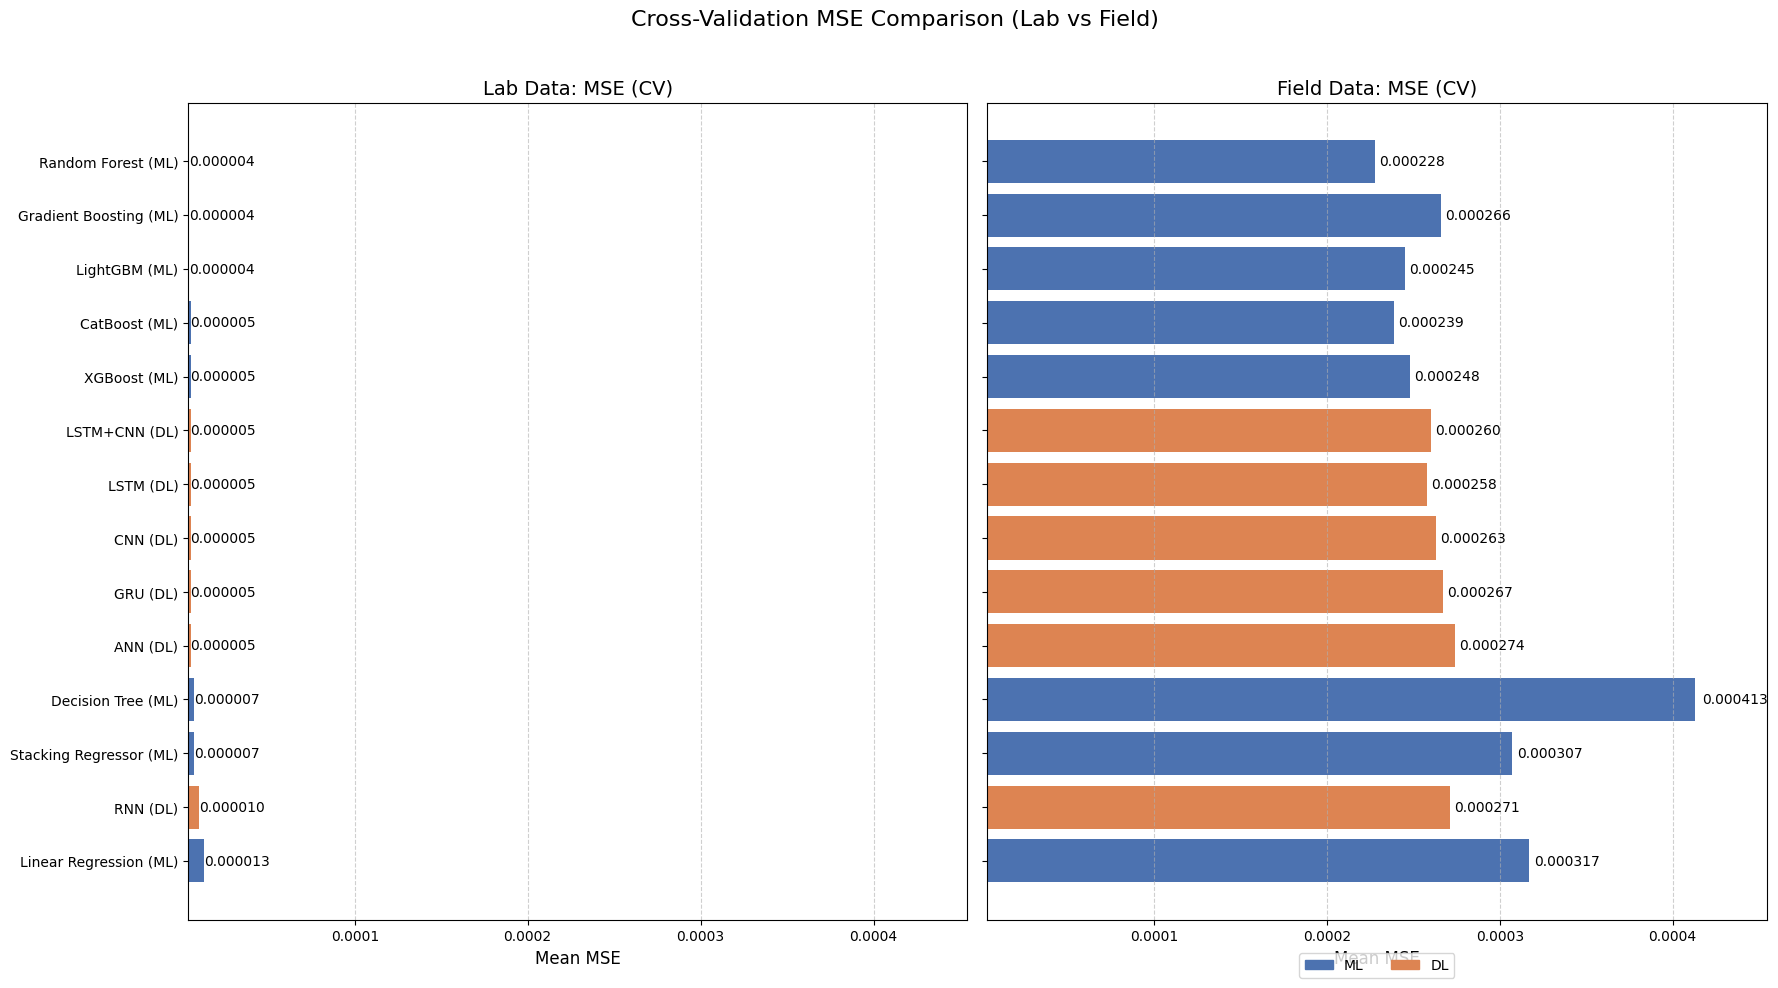

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# === Lab Data (CV Results) ===
lab_models = [
    # ML
    ("Linear Regression (ML)", 0.2565, 0.000013),
    ("Stacking Regressor (ML)", 0.5799, 0.000007),
    ("Decision Tree (ML)", 0.6157, 0.000007),
    ("XGBoost (ML)", 0.7308, 0.000005),
    ("CatBoost (ML)", 0.7412, 0.000005),
    ("LightGBM (ML)", 0.7428, 0.000004),
    ("Gradient Boosting (ML)", 0.7566, 0.000004),
    ("Random Forest (ML)", 0.7832, 0.000004),
    # DL
    ("RNN (DL)", 0.4383, 0.000010),
    ("ANN (DL)", 0.6961, 0.000005),
    ("GRU (DL)", 0.7015, 0.000005),
    ("CNN (DL)", 0.7136, 0.000005),
    ("LSTM (DL)", 0.7230, 0.000005),
    ("LSTM+CNN (DL)", 0.7294, 0.000005),
]

# === Field Data (CV Results) ===
field_models = [
    # ML
    ("Linear Regression (ML)", 0.4462, 0.000317),
    ("Stacking Regressor (ML)", 0.4643, 0.000307),
    ("Decision Tree (ML)", 0.2791, 0.000413),
    ("XGBoost (ML)", 0.5671, 0.000248),
    ("CatBoost (ML)", 0.5836, 0.000239),
    ("LightGBM (ML)", 0.5727, 0.000245),
    ("Gradient Boosting (ML)", 0.5355, 0.000266),
    ("Random Forest (ML)", 0.6027, 0.000228),
    # DL
    ("ANN (DL)", 0.4982, 0.000274),
    ("RNN (DL)", 0.5037, 0.000271),
    ("GRU (DL)", 0.5122, 0.000267),
    ("CNN (DL)", 0.5203, 0.000263),
    ("LSTM+CNN (DL)", 0.5249, 0.000260),
    ("LSTM (DL)", 0.5284, 0.000258),
]

# Convert to DataFrames
df_lab = pd.DataFrame(lab_models, columns=["Model", "R2", "MSE"])
df_lab["Dataset"] = "Lab"
df_field = pd.DataFrame(field_models, columns=["Model", "R2", "MSE"])
df_field["Dataset"] = "Field"
df_all = pd.concat([df_lab, df_field], ignore_index=True)

# Sorting by R2 ascending within each dataset
df_all["Model Type"] = df_all["Model"].apply(lambda x: "ML" if "(ML)" in x else "DL")
df_all_sorted = df_all.sort_values(by=["Dataset", "R2"], ascending=[True, True])

# Define color map
color_map = {"ML": "#4C72B0", "DL": "#DD8452"}

# Determine common R2 and MSE axis limits
r2_min = df_all_sorted["R2"].min() - 0.05
r2_max = df_all_sorted["R2"].max() + 0.05
mse_min = df_all_sorted["MSE"].min() * 0.9
mse_max = df_all_sorted["MSE"].max() * 1.1

import matplotlib.pyplot as plt
import seaborn as sns

# === R2 PLOT ===
fig, ax = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
for i, dataset in enumerate(["Lab", "Field"]):
    subset = df_all_sorted[df_all_sorted["Dataset"] == dataset]
    bars = ax[i].barh(subset["Model"], subset["R2"], color=[color_map[t] for t in subset["Model Type"]])
    ax[i].set_title(f"{dataset} Data: R² Score (CV)", fontsize=14)
    ax[i].set_xlabel("Mean R²", fontsize=12)
    ax[i].set_xlim(r2_min, r2_max)
    ax[i].invert_yaxis()
    ax[i].grid(axis='x', linestyle='--', alpha=0.6)
    for bar, r2 in zip(bars, subset["R2"]):
        ax[i].text(r2 + 0.005, bar.get_y() + bar.get_height()/2, f"{r2:.3f}", va='center', fontsize=10)

# Add legend
plt.suptitle("Cross-Validation R² Score Comparison (Lab vs Field)", fontsize=16)
plt.legend(handles=[plt.Rectangle((0,0),1,1,color=color_map[t]) for t in color_map],
           labels=color_map.keys(), loc="lower center", bbox_to_anchor=(0.5, -0.08), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# === MSE PLOT ===
fig, ax = plt.subplots(1, 2, figsize=(18, 10), sharey=True)
for i, dataset in enumerate(["Lab", "Field"]):
    subset = df_all_sorted[df_all_sorted["Dataset"] == dataset]
    bars = ax[i].barh(subset["Model"], subset["MSE"], color=[color_map[t] for t in subset["Model Type"]])
    ax[i].set_title(f"{dataset} Data: MSE (CV)", fontsize=14)
    ax[i].set_xlabel("Mean MSE", fontsize=12)
    ax[i].set_xlim(mse_min, mse_max)
    ax[i].invert_yaxis()
    ax[i].grid(axis='x', linestyle='--', alpha=0.6)
    for bar, mse in zip(bars, subset["MSE"]):
        ax[i].text(mse * 1.01, bar.get_y() + bar.get_height()/2, f"{mse:.6f}", va='center', fontsize=10)

plt.suptitle("Cross-Validation MSE Comparison (Lab vs Field)", fontsize=16)
plt.legend(handles=[plt.Rectangle((0,0),1,1,color=color_map[t]) for t in color_map],
           labels=color_map.keys(), loc="lower center", bbox_to_anchor=(0.5, -0.08), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




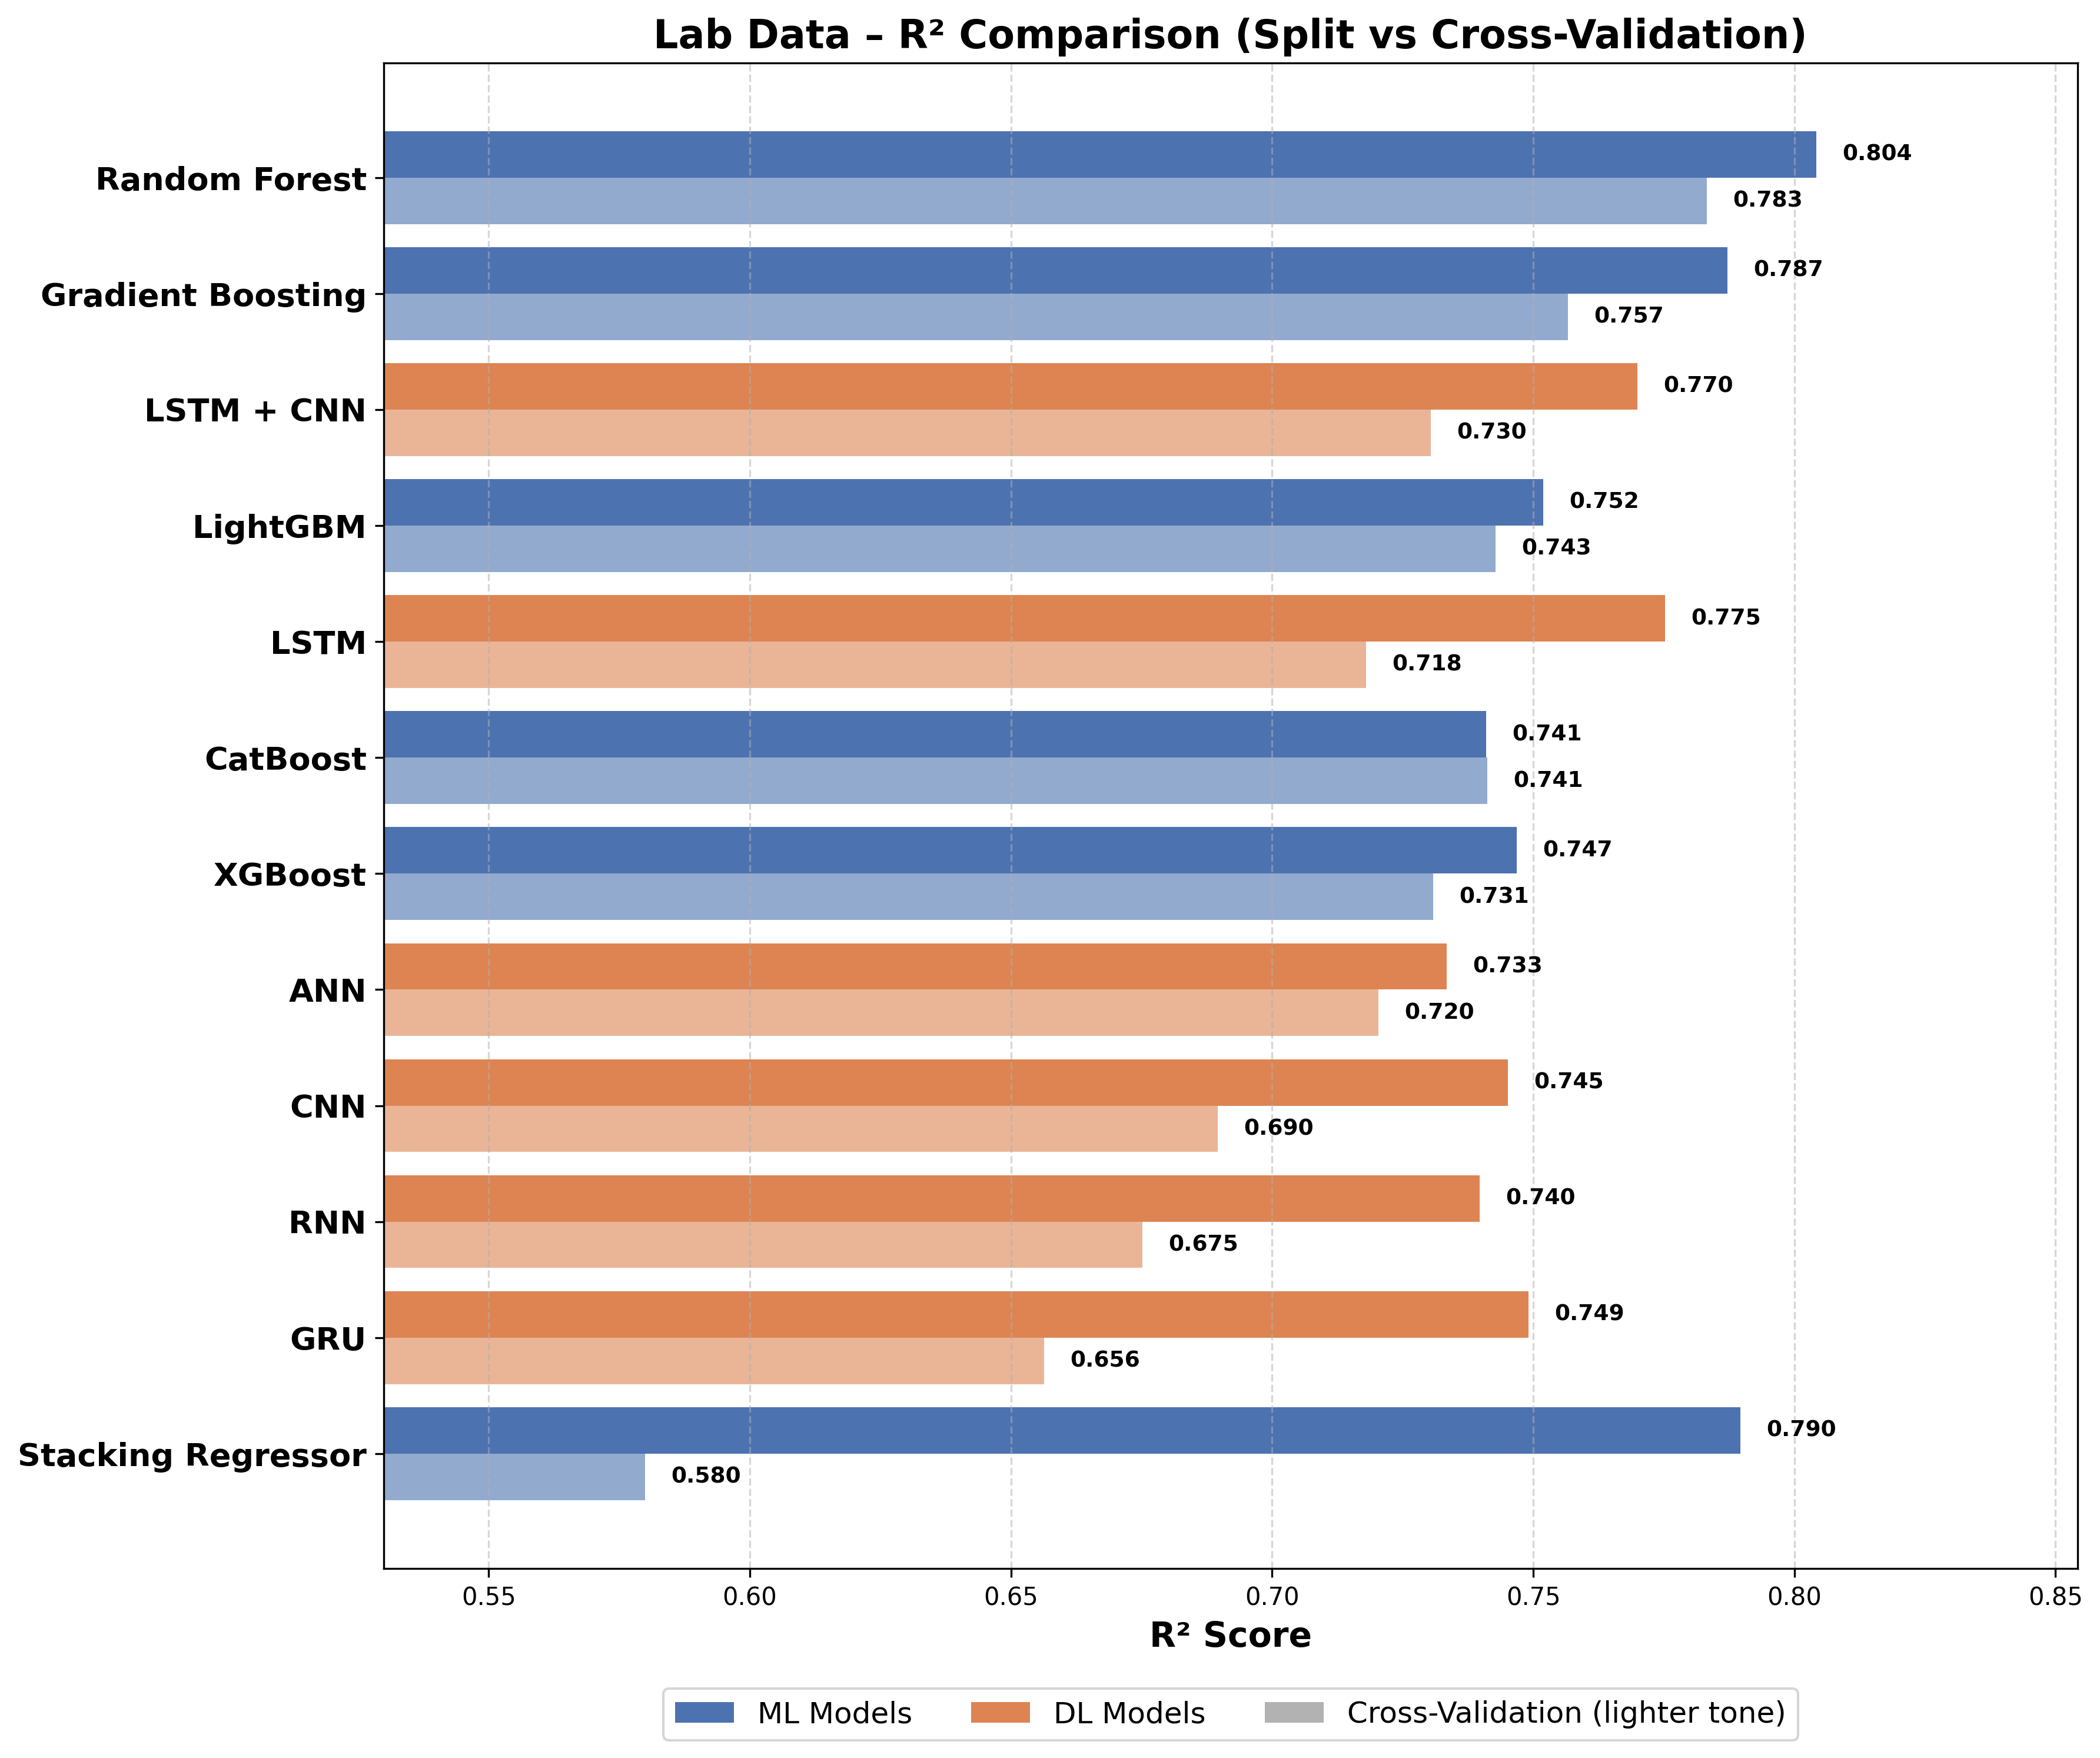

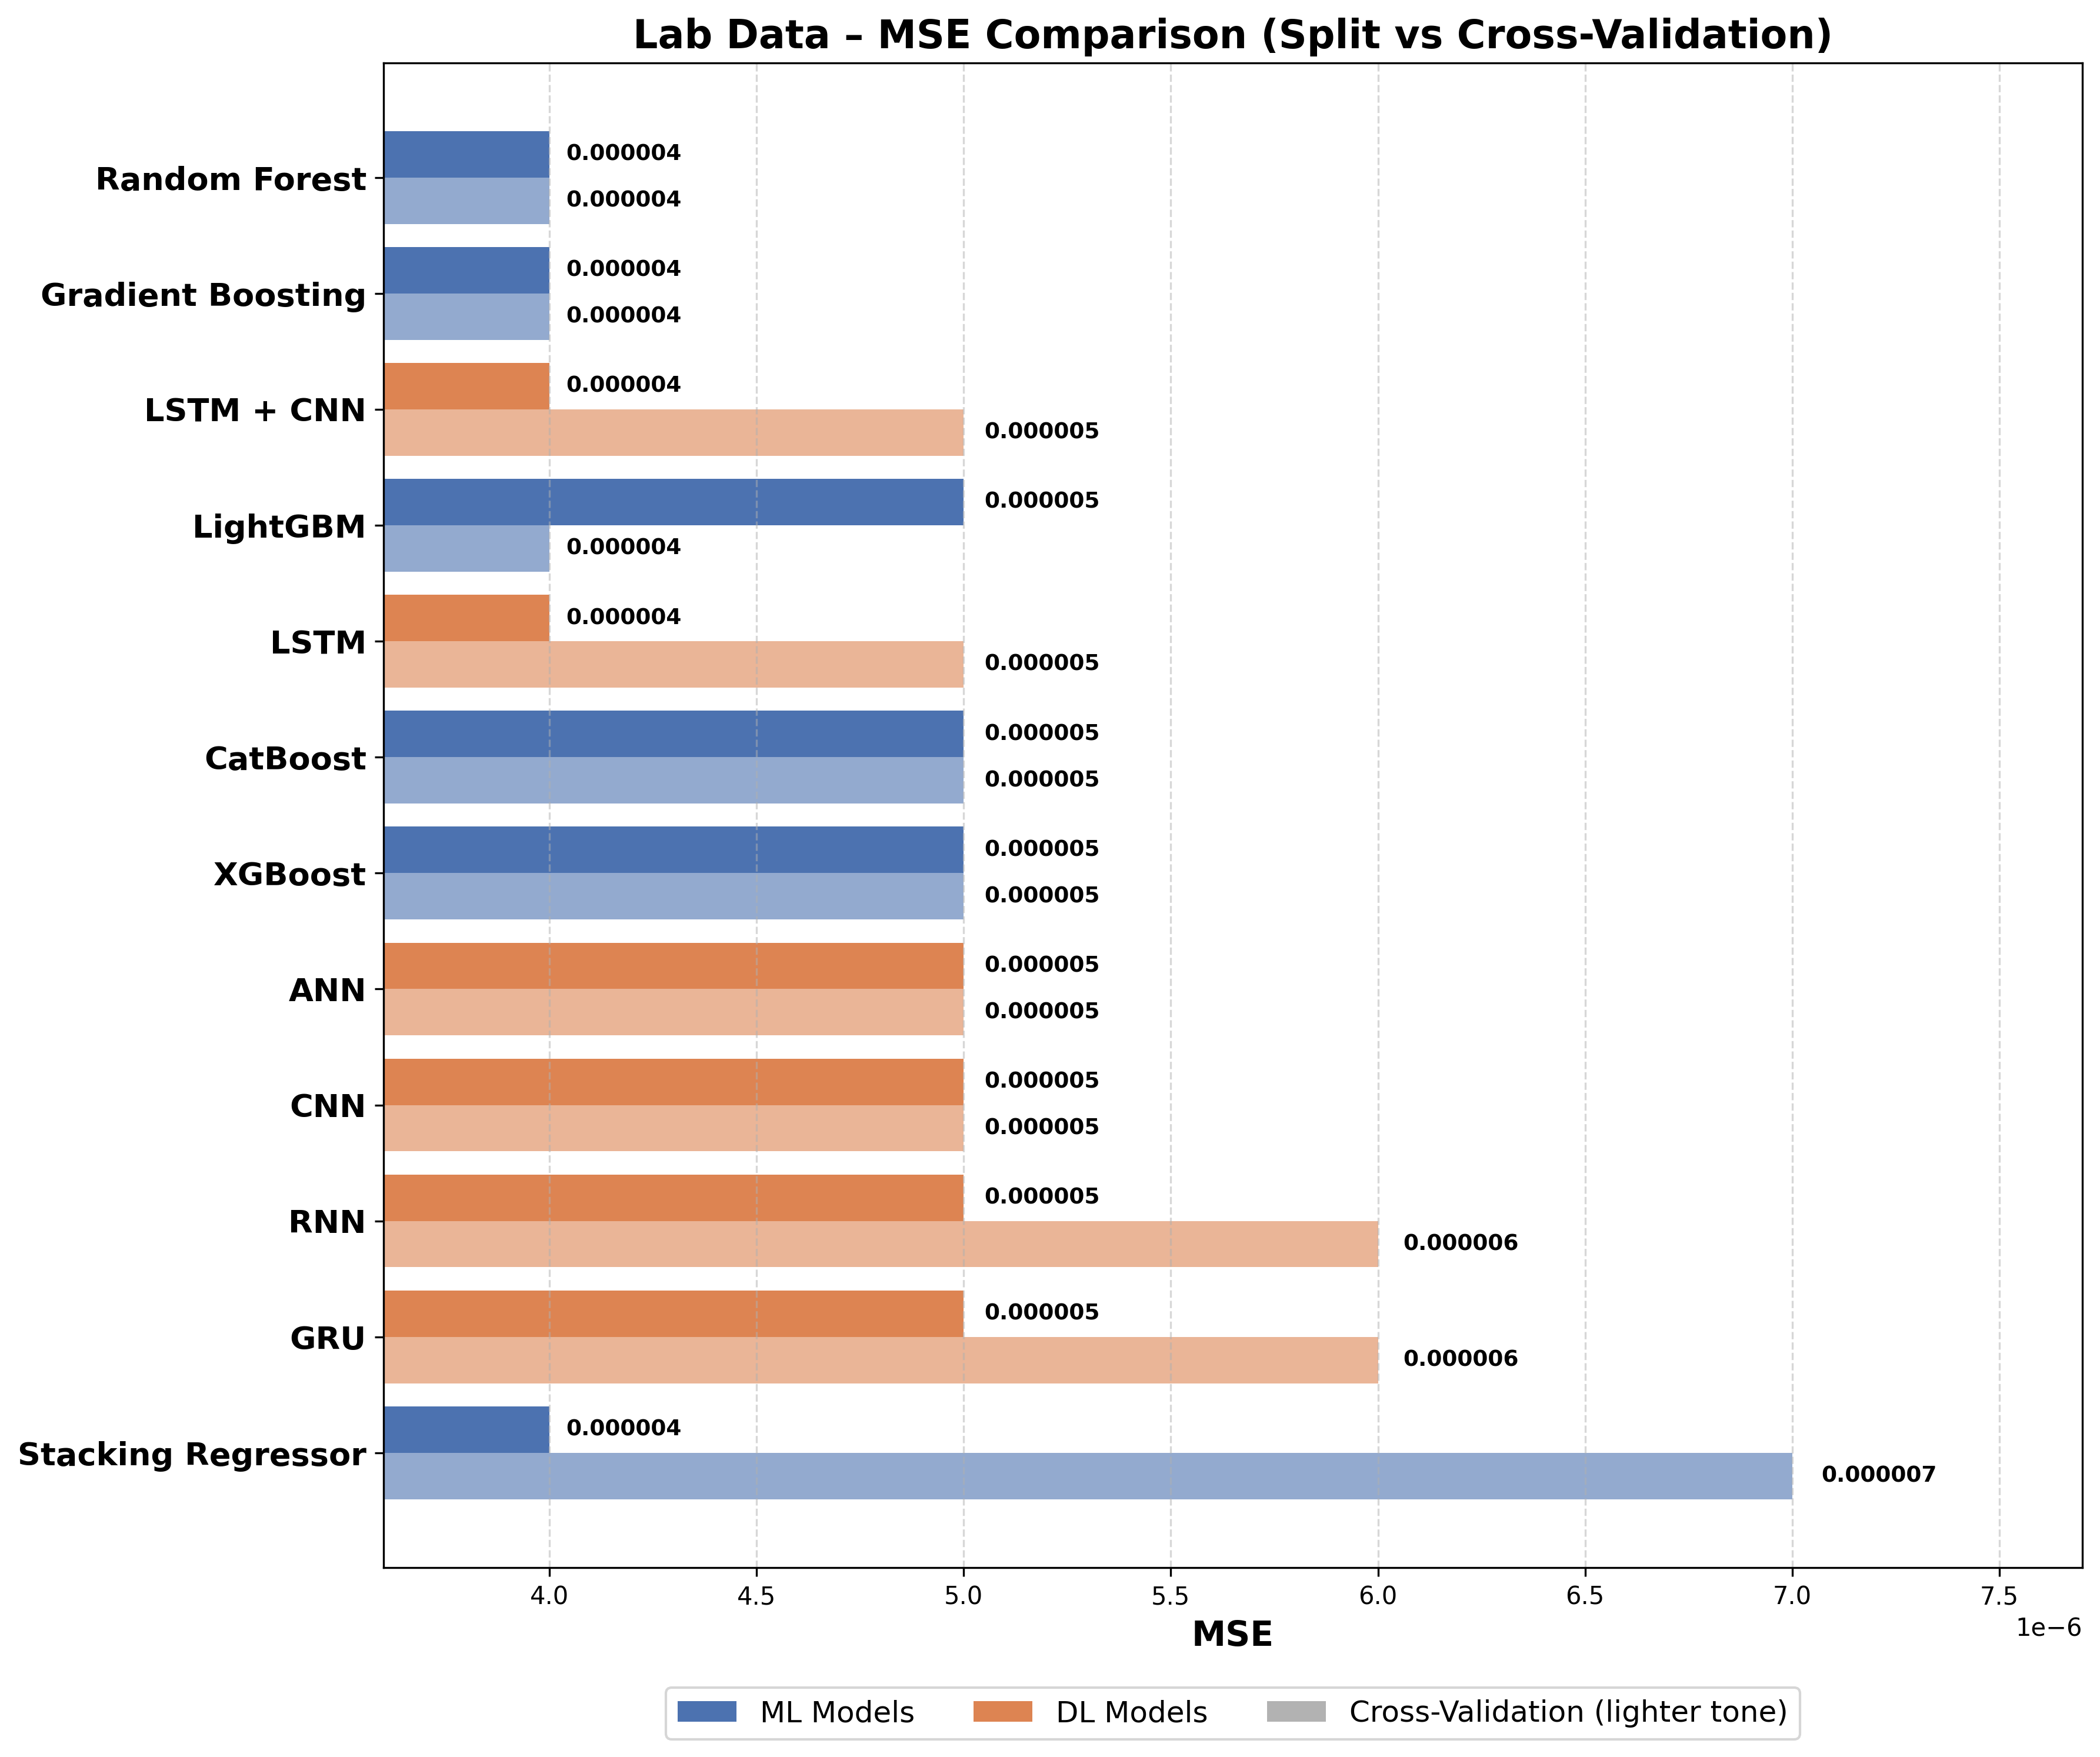

In [10]:
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib.patches import Patch

# === Lab Data: Split Validation Results ===
lab_split = [
    ("CatBoost", 0.7410, 0.000005),
    ("XGBoost", 0.7468, 0.000005),
    ("LightGBM", 0.7519, 0.000005),
    ("Gradient Boosting", 0.7872, 0.000004),
    ("Stacking Regressor", 0.7897, 0.000004),
    ("Random Forest", 0.8042, 0.000004),
    ("RNN", 0.7397, 0.000005),
    ("GRU", 0.7491, 0.000005),
    ("CNN", 0.7451, 0.000005),
    ("ANN", 0.7334, 0.000005),
    ("LSTM + CNN", 0.7699, 0.000004),
    ("LSTM",  0.7752, 0.000004),
]

# === Lab Data: Cross-Validation Results ===
lab_cv = [
    ("CatBoost", 0.7412, 0.000005),
    ("XGBoost", 0.7308, 0.000005),
    ("LightGBM", 0.7428, 0.000004),
    ("Gradient Boosting", 0.7566, 0.000004),
    ("Stacking Regressor", 0.5799, 0.000007),
    ("Random Forest", 0.7832, 0.000004),
    ("RNN", 0.6752, 0.000006),
    ("GRU", 0.6563, 0.000006),
    ("CNN", 0.6896, 0.000005),
    ("ANN", 0.7203, 0.000005),
    ("LSTM + CNN", 0.7304, 0.000005),
    ("LSTM",  0.7180, 0.000005),
]

# Convert to DataFrames
df_split = pd.DataFrame(lab_split, columns=["Model", "R2_Split", "MSE_Split"])
df_cv = pd.DataFrame(lab_cv, columns=["Model", "R2_CV", "MSE_CV"])

# Merge and sort
df = pd.merge(df_split, df_cv, on="Model")
df["R2_avg"] = (df["R2_Split"] + df["R2_CV"]) / 2
df = df.sort_values(by="R2_avg", ascending=False).reset_index(drop=True)

# Assign model types
ml_models = ["CatBoost", "XGBoost", "LightGBM", "Gradient Boosting", "Stacking Regressor", "Random Forest"]
df["Type"] = df["Model"].apply(lambda x: "ML" if x in ml_models else "DL")
color_map = {"ML": "#4C72B0", "DL": "#DD8452"}

# Shared limits
r2_min = min(df["R2_Split"].min(), df["R2_CV"].min()) - 0.05
r2_max = max(df["R2_Split"].max(), df["R2_CV"].max()) + 0.05
mse_min = min(df["MSE_Split"].min(), df["MSE_CV"].min()) * 0.9
mse_max = max(df["MSE_Split"].max(), df["MSE_CV"].max()) * 1.1

# === R² Comparison Plot ===
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
y = range(len(df))
ax.barh(y, df["R2_Split"], height=0.4, color=[color_map[t] for t in df["Type"]],
        label="Split", align='center')
ax.barh([i + 0.4 for i in y], df["R2_CV"], height=0.4, color=[color_map[t] for t in df["Type"]],
        alpha=0.6, label="Cross-Validation", align='center')

ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(df["Model"], fontsize=13, fontweight='bold', color='black')
ax.invert_yaxis()
ax.set_xlabel("R² Score", fontsize=14, fontweight='bold')
ax.set_title("Lab Data – R² Comparison (Split vs Cross-Validation)", fontsize=16, fontweight='bold')

# <<< EDIT: Clamp left axis at 0 >>>
ax.set_xlim(max(0, r2_min), r2_max)

for i in y:
    ax.text(df["R2_Split"][i] + 0.005, i, f"{df['R2_Split'][i]:.3f}", va='center', fontsize=9, fontweight='bold')
    ax.text(df["R2_CV"][i] + 0.005, i + 0.4, f"{df['R2_CV'][i]:.3f}", va='center', fontsize=9, fontweight='bold')

# Legend below plot
legend_elements = [
    Patch(facecolor=color_map["ML"], label="ML Models"),
    Patch(facecolor=color_map["DL"], label="DL Models"),
    Patch(facecolor="gray", label="Cross-Validation (lighter tone)", alpha=0.6)
]
ax.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.07), ncol=3, fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# === MSE Comparison Plot ===
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
ax.barh(y, df["MSE_Split"], height=0.4, color=[color_map[t] for t in df["Type"]],
        label="Split", align='center')
ax.barh([i + 0.4 for i in y], df["MSE_CV"], height=0.4, color=[color_map[t] for t in df["Type"]],
        alpha=0.6, label="Cross-Validation", align='center')

ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(df["Model"], fontsize=13, fontweight='bold', color='black')
ax.invert_yaxis()
ax.set_xlabel("MSE", fontsize=14, fontweight='bold')
ax.set_title("Lab Data – MSE Comparison (Split vs Cross-Validation)", fontsize=16, fontweight='bold')
ax.set_xlim(mse_min, mse_max)

# <<< EDIT: use scientific notation for MSE axis >>>
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2, 2))

for i in y:
    ax.text(df["MSE_Split"][i] * 1.01, i, f"{df['MSE_Split'][i]:.6f}", va='center', fontsize=9, fontweight='bold')
    ax.text(df["MSE_CV"][i] * 1.01, i + 0.4, f"{df['MSE_CV'][i]:.6f}", va='center', fontsize=9, fontweight='bold')

ax.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.07), ncol=3, fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()





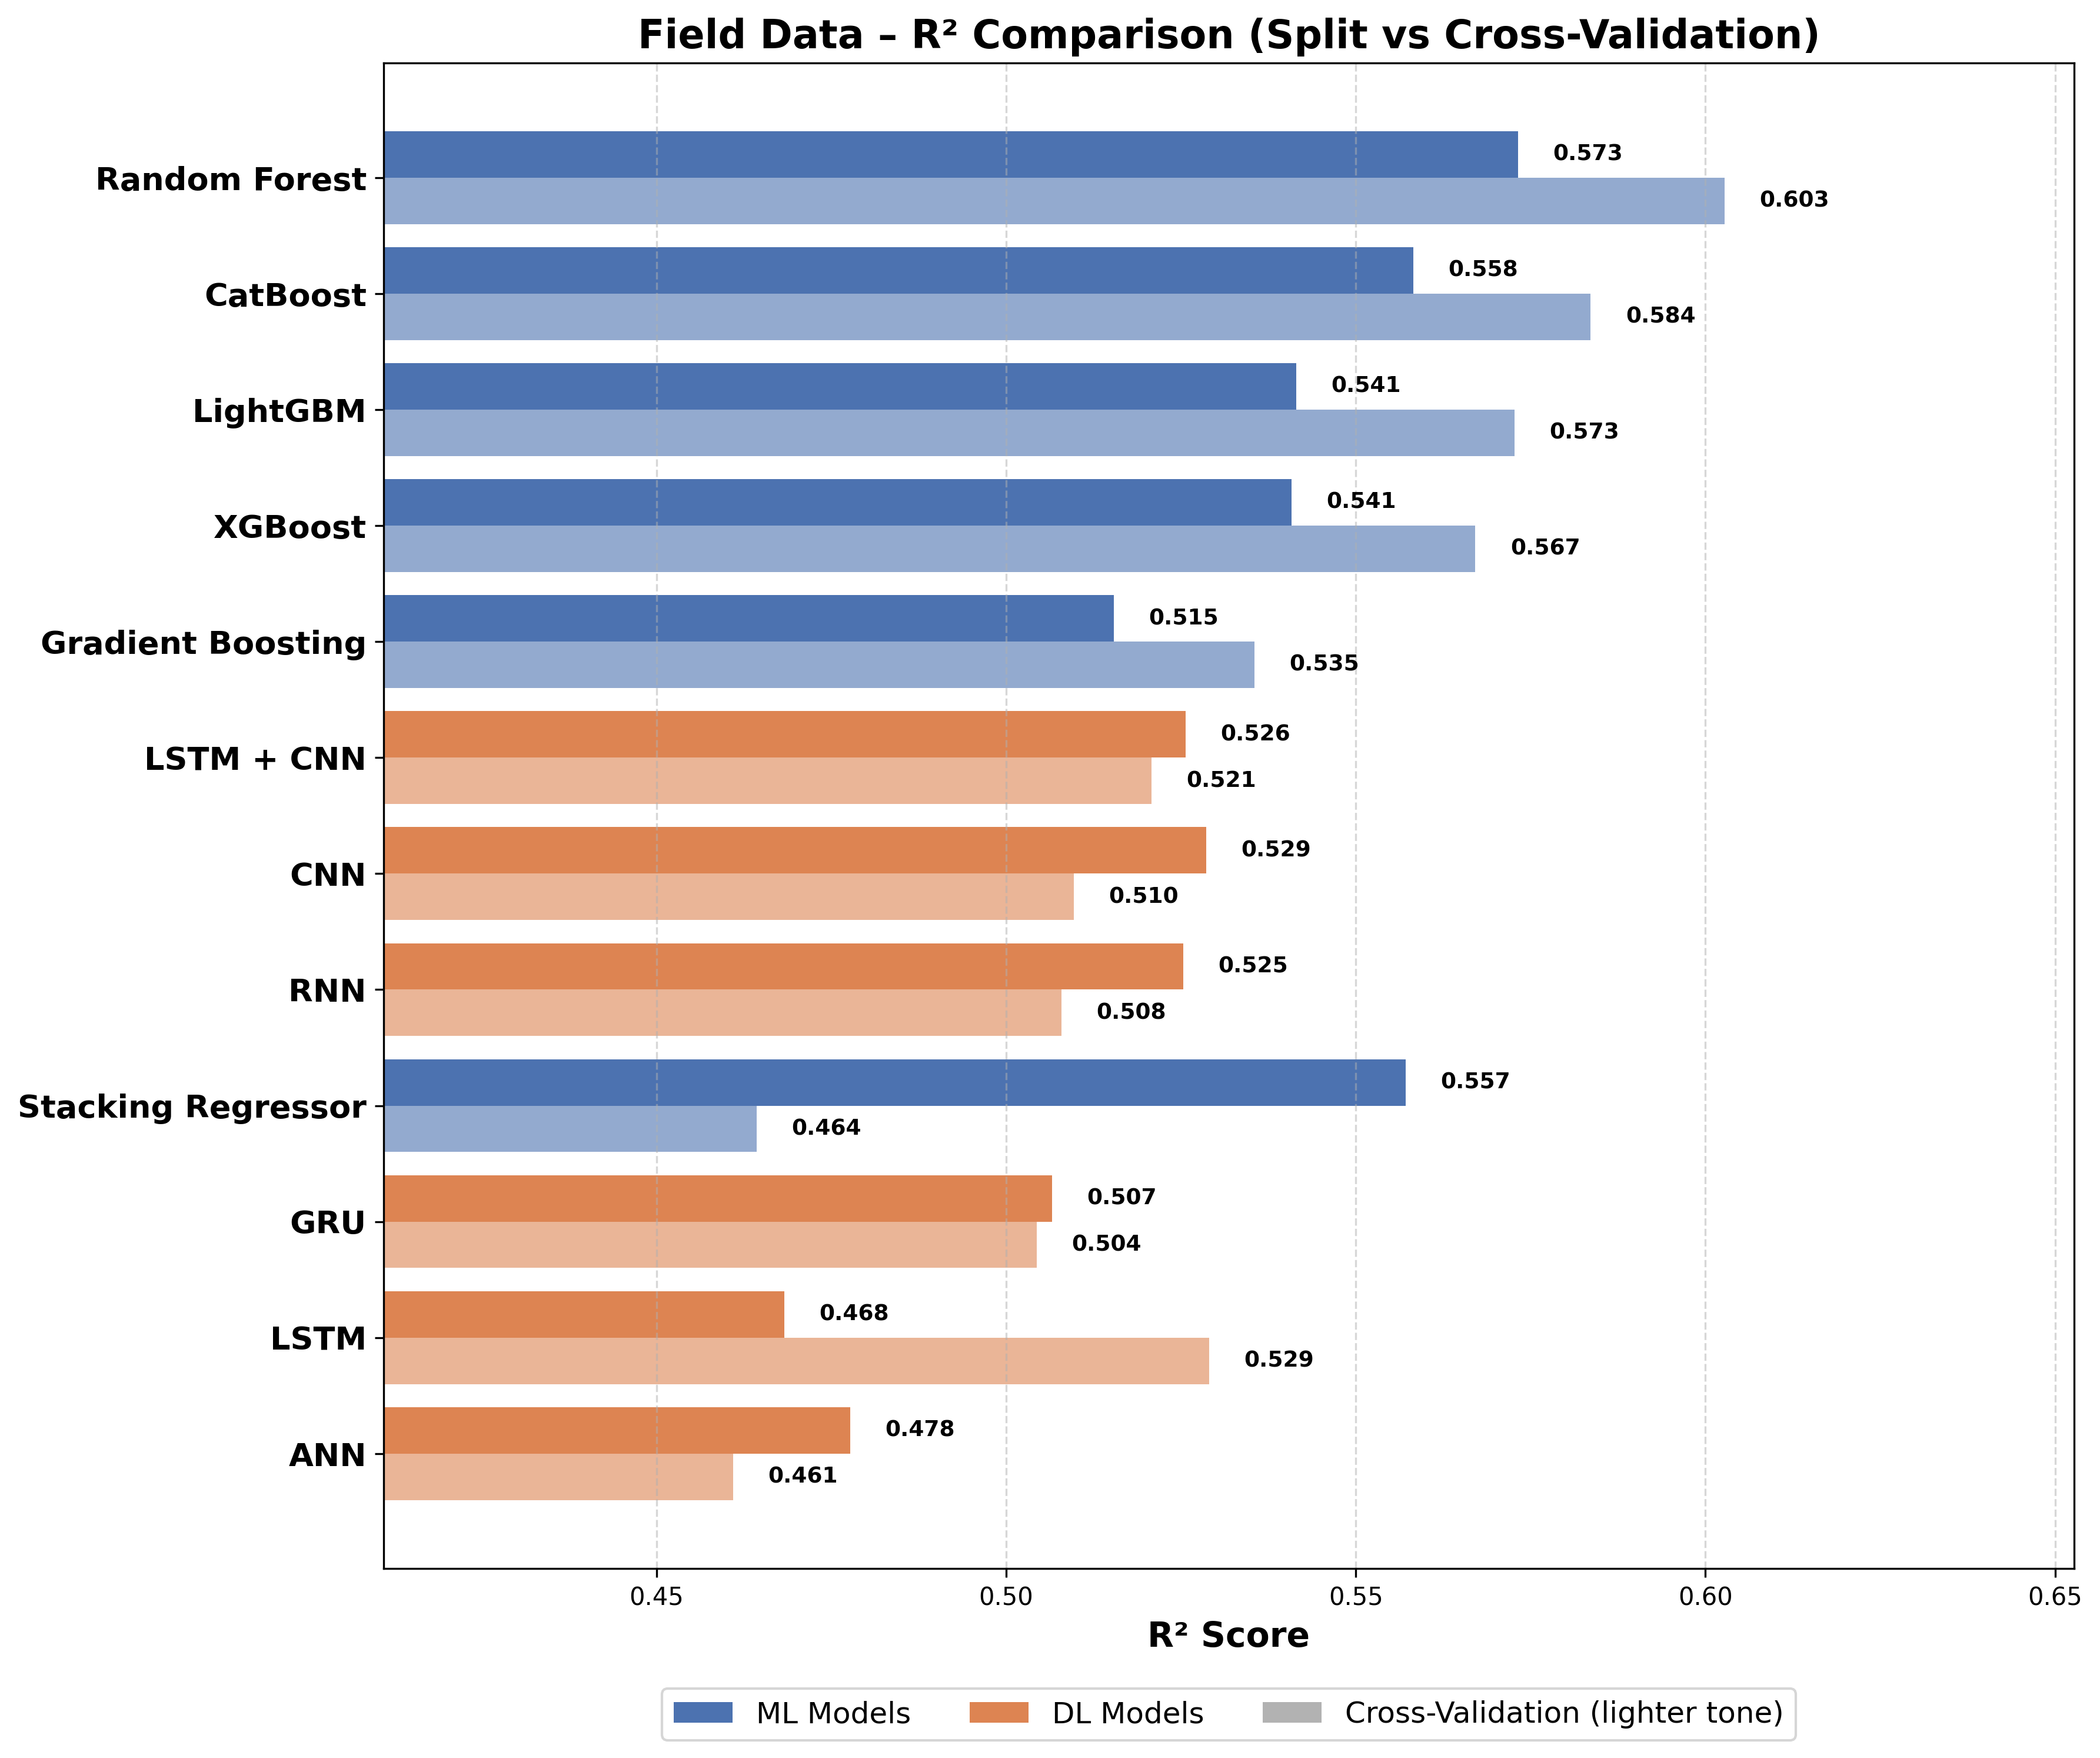

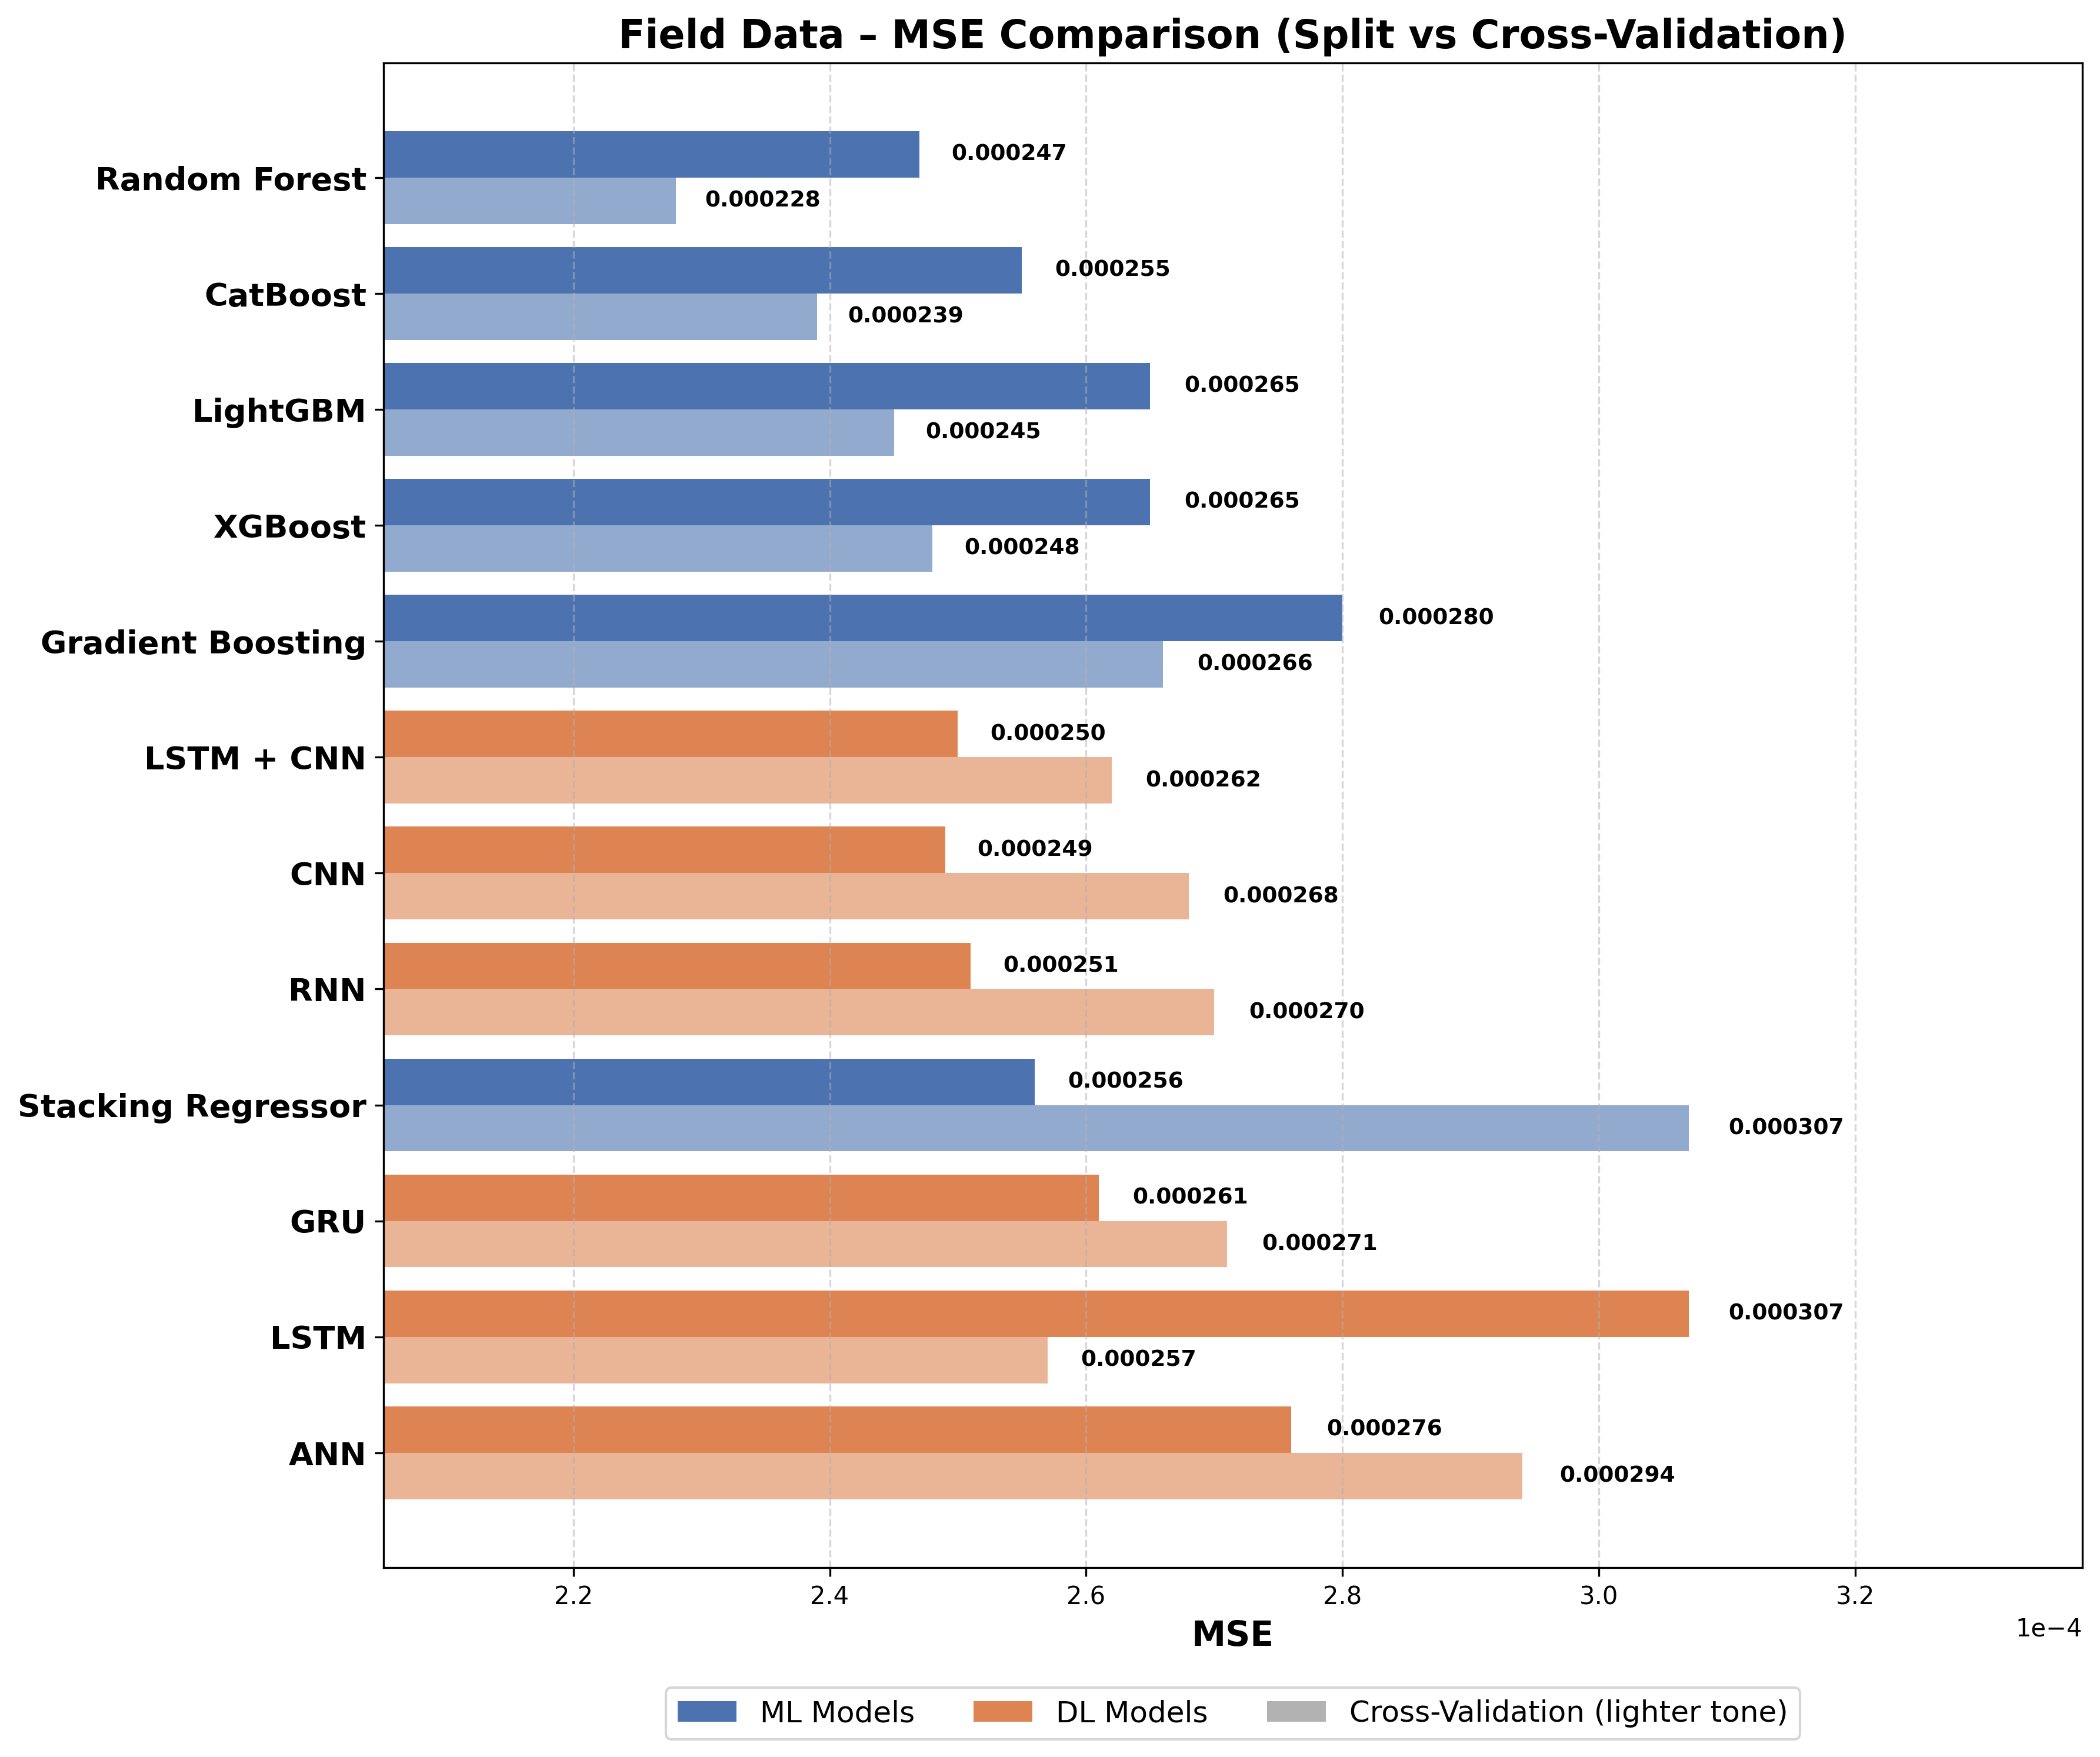

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# === Field Data (Split vs CV Results) ===
field_models = [
    # Format: ("Model", R2_split, MSE_split, R2_cv, MSE_cv)
    ("Random Forest", 0.5732, 0.000247, 0.6027, 0.000228),
    ("LSTM + CNN", 0.5257, 0.000250, 0.5208, 0.000262),
    ("LSTM", 0.4683, 0.000307, 0.5290, 0.000257),
    ("CatBoost", 0.5582, 0.000255, 0.5836, 0.000239),
    ("CNN", 0.5286, 0.000249, 0.5097, 0.000268),
    ("Stacking Regressor", 0.5571, 0.000256, 0.4643, 0.000307),
    ("XGBoost", 0.5408, 0.000265, 0.5671, 0.000248),
    ("RNN", 0.5253, 0.000251, 0.5079, 0.000270),
    ("LightGBM", 0.5415, 0.000265, 0.5727, 0.000245),
    ("GRU", 0.5066, 0.000261, 0.5044, 0.000271),
    ("ANN", 0.4777, 0.000276, 0.4610, 0.000294),
    ("Gradient Boosting", 0.5154, 0.000280, 0.5355, 0.000266),
    # ("Decision Tree", 0.1952, 0.000465, 0.2791, 0.000413),
]

# Create DataFrame
df = pd.DataFrame(field_models, columns=["Model", "R2_Split", "MSE_Split", "R2_CV", "MSE_CV"])

# Define model types for color mapping
ml_models = [
    "Random Forest", "CatBoost", "Stacking Regressor", "XGBoost",
    "LightGBM", "Gradient Boosting", "Decision Tree"
]
df["Type"] = df["Model"].apply(lambda x: "ML" if x in ml_models else "DL")

# Color mapping
color_map = {"ML": "#4C72B0", "DL": "#DD8452"}

# Sort by average R²
df["R2_avg"] = (df["R2_Split"] + df["R2_CV"]) / 2
df = df.sort_values(by="R2_avg", ascending=False).reset_index(drop=True)

# Shared axis limits
r2_min = min(df["R2_Split"].min(), df["R2_CV"].min()) - 0.05
r2_max = max(df["R2_Split"].max(), df["R2_CV"].max()) + 0.05
mse_min = min(df["MSE_Split"].min(), df["MSE_CV"].min()) * 0.9
mse_max = max(df["MSE_Split"].max(), df["MSE_CV"].max()) * 1.1

# === R² Comparison Plot – Field ===
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
y = range(len(df))
ax.barh(y, df["R2_Split"], height=0.4,
        color=[color_map[t] for t in df["Type"]], label="Split", align='center')
ax.barh([i + 0.4 for i in y], df["R2_CV"], height=0.4,
        color=[color_map[t] for t in df["Type"]], alpha=0.6,
        label="Cross-Validation", align='center')

ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(df["Model"], fontsize=13, fontweight='bold', color='black')
ax.invert_yaxis()
ax.set_xlabel("R² Score", fontsize=14, fontweight='bold')
ax.set_title("Field Data – R² Comparison (Split vs Cross-Validation)", fontsize=16, fontweight='bold')

# <<< Clamp left axis at 0 >>>
ax.set_xlim(max(0, r2_min), r2_max)

for i in y:
    ax.text(df["R2_Split"][i] + 0.005, i, f"{df['R2_Split'][i]:.3f}", va='center', fontsize=9, fontweight='bold')
    ax.text(df["R2_CV"][i] + 0.005, i + 0.4, f"{df['R2_CV'][i]:.3f}", va='center', fontsize=9, fontweight='bold')

# Custom legend
legend_elements = [
    Patch(facecolor=color_map["ML"], label="ML Models"),
    Patch(facecolor=color_map["DL"], label="DL Models"),
    Patch(facecolor="gray", label="Cross-Validation (lighter tone)", alpha=0.6)
]
ax.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.07), ncol=3, fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# === MSE Comparison Plot – Field ===
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
ax.barh(y, df["MSE_Split"], height=0.4,
        color=[color_map[t] for t in df["Type"]], label="Split", align='center')
ax.barh([i + 0.4 for i in y], df["MSE_CV"], height=0.4,
        color=[color_map[t] for t in df["Type"]], alpha=0.6,
        label="Cross-Validation", align='center')

ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(df["Model"], fontsize=13, fontweight='bold', color='black')
ax.invert_yaxis()
ax.set_xlabel("MSE", fontsize=14, fontweight='bold')
ax.set_title("Field Data – MSE Comparison (Split vs Cross-Validation)", fontsize=16, fontweight='bold')
ax.set_xlim(mse_min, mse_max)

# <<< Scientific notation for MSE axis >>>
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2, 2))

for i in y:
    ax.text(df["MSE_Split"][i] * 1.01, i, f"{df['MSE_Split'][i]:.6f}", va='center', fontsize=9, fontweight='bold')
    ax.text(df["MSE_CV"][i] * 1.01, i + 0.4, f"{df['MSE_CV'][i]:.6f}", va='center', fontsize=9, fontweight='bold')

ax.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.07), ncol=3, fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

